/tmp/ipykernel_9897/3644367480.py:13: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  c['part'] = c['part'].str.lower().str.rsplit(' ', 1).apply(


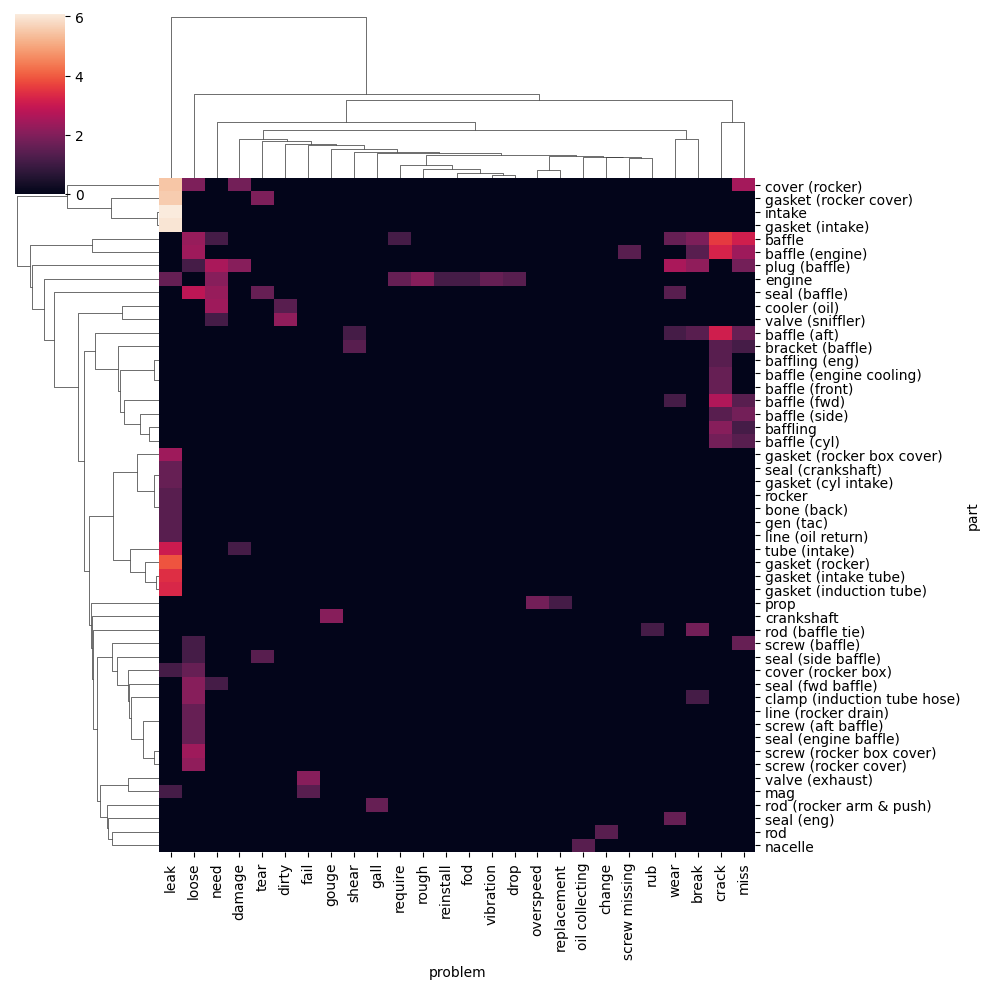

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from nltk.stem import WordNetLemmatizer
 
# problem_extractions = pd.read_csv('problem_extractions_regex.csv')
# problem_extractions = pd.read_csv('problem_extractions_chatgpt.csv')
problem_extractions = pd.read_csv('problem_extractions_chatgpt_2.csv')

lemmatizer = WordNetLemmatizer()
c = problem_extractions[['part','problem']].fillna('')
c = c[c['part'] != '']
c['part'] = c['part'].str.lower().str.rsplit(' ', 1).apply(
    lambda x: f'{lemmatizer.lemmatize(x[-1], pos="n")} ({x[0]})' if len(x)>1 else lemmatizer.lemmatize(x[0], pos="n"))
c['problem'] = c['problem'].apply(lambda p: lemmatizer.lemmatize(p.lower(), pos='v'))
c = c.value_counts()
m = c.head(150).unstack().fillna(0)

import seaborn as sns
n = 50
m = m[m.columns[m.iloc[:n].any()]].iloc[:n] # show part
sns.clustermap(np.log1p(m), yticklabels=1, xticklabels=1)

In [64]:
parts = problem_extractions['part'].dropna()
tree = pd.Series(parts).str.rsplit(' ', 1, expand=True)
tree = tree.apply(lambda x: pd.Series([x[1] if x[1] else x[0], x[0] if x[1] else '']), axis=1)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tree[0] = tree[0].str.lower().apply(lemmatizer.lemmatize, pos='n').str.upper()

tree_count = tree.value_counts()
tree_count.groupby(level=0).apply(lambda x: x[x>4]).droplevel(level=0).to_frame()

/tmp/ipykernel_29063/666799312.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  tree = pd.Series(parts).str.rsplit(' ', 1, expand=True)


0
0          1                       
BAFFLE                           91
           ENGINE                64
           AFT                   42
           FWD                   26
           SIDE                  10
           CYL                    9
           ENG                    7
           BACK                   6
           REAR                   5
           ENGINE COOLING         5
           FRONT                  5
BAFFLING                         10
BRACKET    BAFFLE                 9
           AFT BAFFLE             8
CLAMP      INDUCTION TUBE HOSE    9
COOLER     OIL                   18
COVER      ROCKER               265
           ROCKER BOX             6
CRANKSHAFT                        7
CYL                               5
CYLINDER                          5
ENGINE                           41
GASKET     INTAKE               396
           ROCKER COVER         277
           ROCKER                49
           INTAKE TUBE           29
           INDUCTION TUBE        26
           ROCKER BOX COVER      10
HOLE       BAFFLE PLUG            5
INTAKE                          441
LINE       ROCKER DRAIN           6
           OIL RETURN             6
MAG                               6
PLUG       BAFFLE                51
           ENGINE BAFFLE          6
PROP                              7
ROD        BAFFLE TIE             9
SCREW      ROCKER COVER          12
           ROCKER BOX COVER      10
           BAFFLE                 6
           AFT BAFFLE             5
                                  5
SEAL       BAFFLE                38
           FWD BAFFLE            13
           ENGINE BAFFLE          7
           SIDE BAFFLE            6
           ENG                    5
           CRANKSHAFT             5
TUBE       INTAKE                26
VALVE      SNIFFLER              12
           EXHAUST                9